# Download the SAM model checkpoint

In [22]:
# !wget "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"

# Import required libraries

In [23]:
from osgeo import gdal
import torch
from samgeo import SamGeo

# Set the input image

In [24]:
image = 'data/HM25_001.tif'

# Convert input image to geospatial

In [25]:
# Georeference the input image
input_ds = gdal.Open(image, gdal.GA_Update)

# Set the geotransform (minX, spacingX, skewX, minY, skewY, spacingY)
geotransform = (1, 0.0005, 0, 2, 0, 0.0005)
input_ds.SetGeoTransform(geotransform)

# Set the reference system
input_ds.SetProjection('EPSG:4326')

# Close the dataset to save changes
input_ds = None

# Use samgeo

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
sam = SamGeo(
    checkpoint='sam_vit_h_4b8939.pth',
    model_type='vit_h',
    device=device,
    erosion_kernel=(3, 3),
    mask_multiplier=255,
    unique=False,
    sam_kwargs=None,
)

mask = 'segment.tif'
sam.generate(image, ouput=mask)

# Display the result

/tmp/ipykernel_7802/2204122918.py:25: UserWarning: The following kwargs were not used by contour: 'linewidth'
  contour_plot = plt.contour(segment_array, cmap='rainbow', linewidth=0.1)


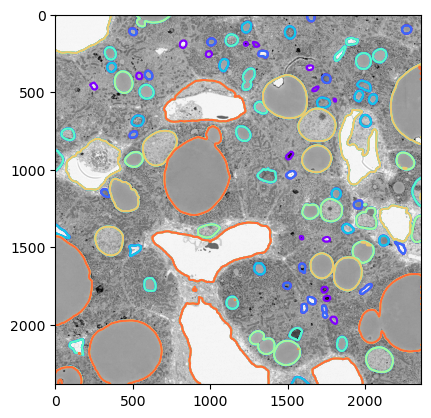

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import numpy as np

# Load the base image (image.tif)
base_image = Image.open(image)
base_array = np.array(base_image)

# Load the semi-transparent layer (segment.tif)
segment_image = Image.open(mask)
segment_array = np.array(segment_image)

# Display the base image
plt.imshow(base_array, cmap='gray')

# Overlay the semi-transparent layer
# cmap_alpha = LinearSegmentedColormap.from_list('custom_cmap', [(0, 0, 0, 0), (0, 0, 0, 1)], N=256)
# plt.imshow(segment_array, cmap=cmap_alpha, alpha=0.5)

# contours = plt.contour(segment_array, colors='red', linewidths=0.1)
# Create a contour plot using the rainbow color palette
contour_plot = plt.contour(segment_array, cmap='rainbow', linewidth=0.1)

# Show the plot
plt.show()
